## Gráficos y Correlaciones

### Desafío 1: 

- Importe las librerías básicas para el análisis de datos
- Descarge e importe el archivo nations.csv . warning: va a encontrar un error en el formato.
¿Cómo lo podemos solucionar?.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("nations.csv", encoding = "LATIN-1")
df

,Unnamed: 0,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
0,1,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.00,NaN
1,2,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.20,NaN
2,3,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.20,NaN
3,4,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.20,NaN
4,5,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.10,33.299999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,190,Samoa,Oceania,4012.600098,10.300000,28.299999,26.75,71.533333,181600,20.666668,0.5010,98.800003,3.10,NaN
190,191,Solomon Islands,Oceania,2249.199951,4.500000,70.300003,36.00,66.500000,503617,17.766666,0.4858,NaN,1.40,NaN
191,192,Tonga,Oceania,4072.199951,10.133333,22.299999,19.25,71.833336,102550,23.266666,0.7150,99.000000,4.85,NaN
192,193,Tuvalu,Oceania,NaN,NaN,23.299999,36.50,66.033333,9767,49.233334,NaN,NaN,NaN,NaN


* Apellidos desde la M hasta la Z enfocarse en las variables:
        * femlab: Tasa entre hombres y mujeres en el mercado laboral, 
        * literacy: Tasa de alfabetismo,
        * school: Promedio años de escolaridad.

In [3]:
df = df[["country", "region", "adfert", "femlab", "literacy", "school"]]

### Desafío 2: 

- Se pide refactorizar con seaborn los siguientes gráficos contruídos con matplotlib. 
- Se presenta la función que se utilizó para construírlos. Intente llegar al resultado con mayor similitud. 

- Comente los principales resultados.


#### 1. Matplotlib

C:\Users\nparco\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


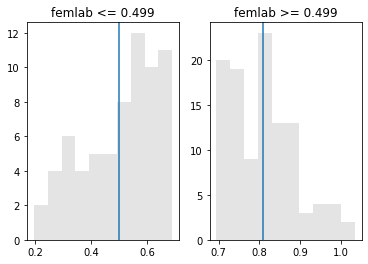

In [4]:
def binarize_histogram(dataframe, variable):
    tmp = dataframe
    tmp['binarize'] = np.where(tmp[variable]>np.mean(tmp[variable]), 1 ,0)
    
    hist_1 = tmp[tmp['binarize'] == 1][variable].dropna()
    hist_0 = tmp[tmp['binarize'] == 0][variable].dropna()
    
    # Primer histograma
    plt.subplot(1, 2, 1)
    plt.hist(hist_0, alpha=.6, color="lightgrey")
    plt.axvline(np.mean(hist_0))
    plt.title("{0} <= {1}".format(variable, round(np.mean(hist_0),3)))
    
    # Segundo histograma
    plt.subplot(1, 2, 2)
    plt.hist(hist_1, alpha=.6, color="lightgrey")
    plt.axvline(np.mean(hist_1))
    plt.title("{0} >= {1}".format(variable, round(np.mean(hist_0),3)))
binarize_histogram(df, 'femlab') 

#### 1. Seaborn

In [5]:
for i in df["region"].unique():
    print(i)
    df[i] = np.where(df["region"]==i, 1, 0)

Africa
Americas
Asia
Europe
Oceania


C:\Users\nparco\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
# Hace un grupby con lo que le pasamos
def histograma (df, var, binarize):
    grid = sns.FacetGrid(df, col= binarize, col_wrap = 3)
    grid = grid.map(sns.distplot, var)
    numero = 0
    for grafico in grid.axes:
        if numero == 0:
            grafico.axvline(df[df[binarize]==0][var].mean())
        else: 
            grafico.axvline(df[df[binarize]==1][var].mean())
        numero += 1

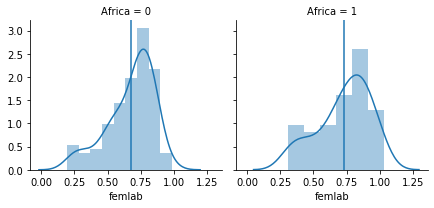

In [7]:
histograma(df,"femlab" ,"Africa")

##### 2. Matplotlib

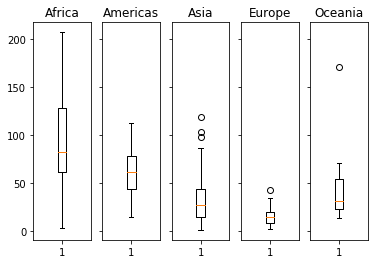

In [8]:
def grouped_boxplot(dataframe, variable, group_by):
    tmp = dataframe
    stratify_by = tmp[group_by].unique()
    
    if len(stratify_by) / 2 > 3:
        fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
    
    else:
        fig, ax = plt.subplots(1, len(stratify_by),sharey=True)
    
    
    for i, n in enumerate(stratify_by):
        ax[i].boxplot(tmp[tmp[group_by] == n][variable])
        ax[i].set_title(n)
        
grouped_boxplot(df, 'adfert', 'region')

##### 2. Seaborn

C:\Users\nparco\Anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


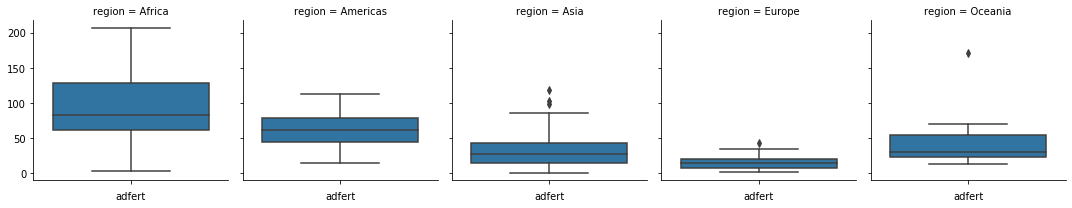

In [9]:
def boxplot(df, var, binarize):
    grid=sns.FacetGrid(df,col=binarize, col_wrap=5)
    grid.map(sns.boxplot, var, orient= "v")
    plt.show()
boxplot(df,'adfert',"region" )

##### 3. Matplotlib

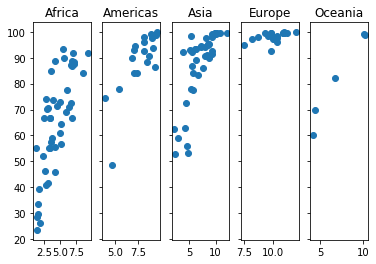

In [10]:
def grouped_scatterplot(dataframe, x, y, group_by):
    tmp = dataframe
    stratify_by = tmp[group_by].unique()
    
    if len(stratify_by) / 2 > 3:
        fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
    else:
        fig, ax = plt.subplots(1, len(stratify_by),sharey=True)
    
    for i, n in enumerate(stratify_by):
        tmp_group_plt = tmp[tmp[group_by] == n]
        ax[i].plot(tmp_group_plt[x], tmp_group_plt[y], 'o')
        ax[i].set_title(n)
grouped_scatterplot(df, 'school', "literacy", 'region')      

##### 3. Seaborn

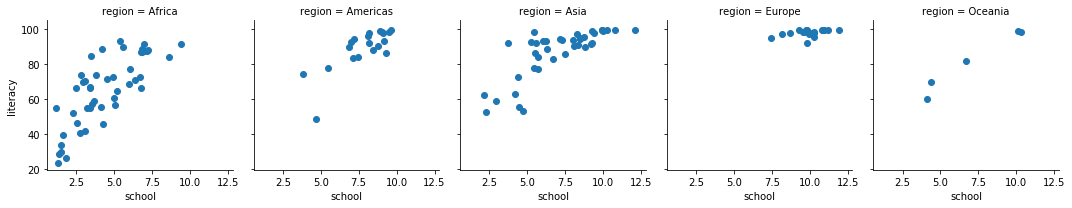

In [11]:
def grouped_scatterplot_sns(df, x, y, group_by):
    grid = sns.FacetGrid(df, col = group_by, col_wrap = 5)
    grid = grid.map(plt.scatter, x, y)
    
grouped_scatterplot_sns(df, "school", "literacy", "region")

### Desafío 3: 

- En base a las variables de interés asignadas, comente cuáles son las principales correlaciones existentes, tomando como criterio de corte aquellas superior a .6

In [12]:
df = df.iloc[:,0:6]
df

,country,region,adfert,femlab,literacy,school
0,Algeria,Africa,7.300000,0.4522,72.599998,6.716667
1,Benin,Africa,111.699997,0.8482,41.700001,3.100000
2,Botswana,Africa,52.099998,0.8870,84.099998,8.600000
3,Burkina Faso,Africa,124.800003,0.8584,23.600000,1.300000
4,Burundi,Africa,18.600000,1.0344,66.599998,2.483333
...,...,...,...,...,...,...
189,Samoa,Oceania,28.299999,0.5010,98.800003,10.300000
190,Solomon Islands,Oceania,70.300003,0.4858,NaN,4.500000
191,Tonga,Oceania,22.299999,0.7150,99.000000,10.133333
192,Tuvalu,Oceania,23.299999,NaN,NaN,NaN


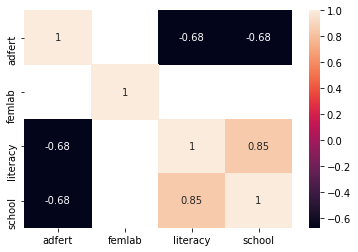

In [13]:
corr = df.corr()[np.abs(df.corr())>.6]
sns.heatmap(corr, annot = True)

In [14]:
print("Las principales correlaciones existentes son entre: adfer y school poseen una correlacion negativa, es decir, cuando una aumenta la otra disminuye. La misma conclusion es posible asumir con adfert y literacy e inversa con literacy y school (positiva).")

Las principales correlaciones existentes son entre: adfer y school poseen una correlacion negativa, es decir, cuando una aumenta la otra disminuye. La misma conclusion es posible asumir con adfert y literacy e inversa con literacy y school (positiva).


### Desafío 4: 

- tip: Genere una nueva tabla segmentando con la siguiente sintáxis: tmp = df.loc[:,['variables', 'a', 'agregar']] . No olvide agregar la variable region .
- tip: Genere un loop para recorrer cada región y generar un heatmap.
- Comente brevemente las principales correlaciones a través de las regiones.

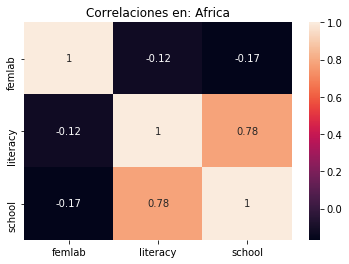

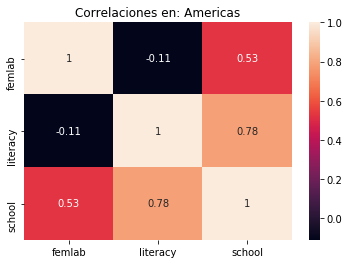

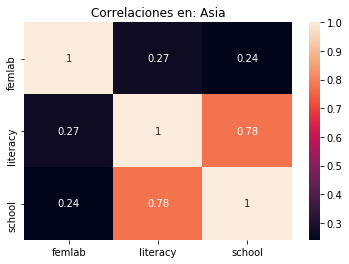

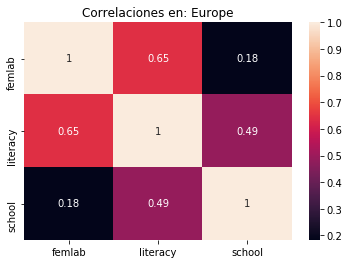

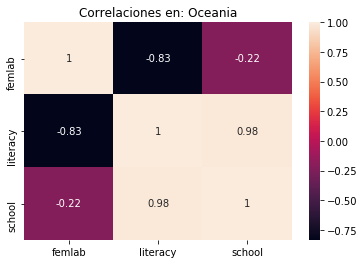

In [15]:
df_subset = df.loc[:, ["region","femlab", "literacy", "school"]]

for i in df["region"].unique():
    plt.figure()
    sns.heatmap(df_subset[df["region"] == i].corr(), annot = True).set_title(f"Correlaciones en: {i}")

Como conclusion regional podriamos decir que lo que cambia es el grado de asociacion entre las variables. Es posible observar como la correlacion positiva entre el nivel de alfabetismo y el grado de escolaridad alcanzado en el caso de Oceanía es casi perfecta y como se separa del resto del mundo Europa con un menor grado de asociación.
Sorprende que el nivel de alfabetismo este asociado negativa con el trabajo femenino en Oceania.

### Bonus Points: 

Grafique los diagramas de dispersión para los principales hallazgos.

Text(0, 0.5, 'Mercado Laboral Femenino')

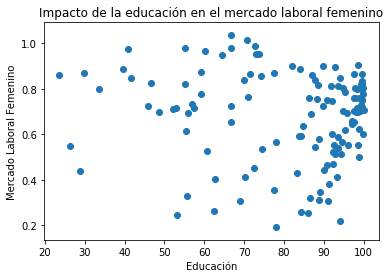

In [16]:
plt.scatter(x = df["literacy"], y = df["femlab"])
plt.title("Impacto de la educación en el mercado laboral femenino")
plt.xlabel("Educación")
plt.ylabel("Mercado Laboral Femenino")

Text(0, 0.5, 'Alfabetismo')

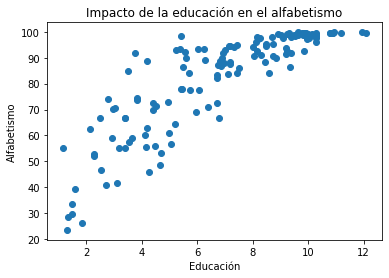

In [17]:
plt.scatter(x = df["school"], y = df["literacy"])
plt.title("Impacto de la educación en el alfabetismo")
plt.xlabel("Educación")
plt.ylabel("Alfabetismo")